In [1]:
from IPython.display import Image

In [2]:
url="http://www.hausgazette.org/py/img/IMG_0939-small.JPG"

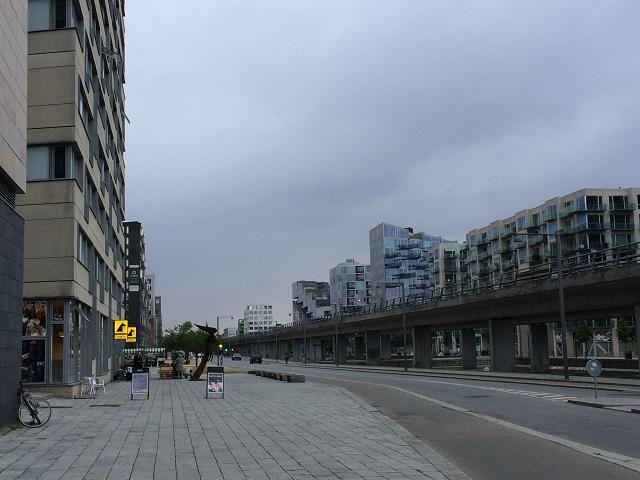

In [3]:
Image(url)

In [4]:
import requests
r = requests.get(url)
r.status_code

200

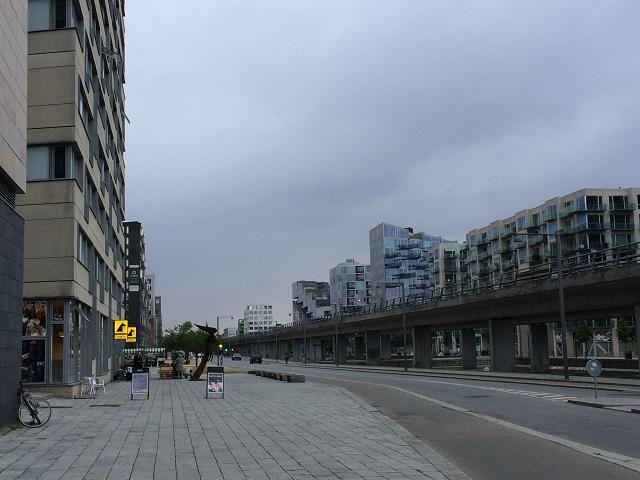

In [5]:
rawdata = r.content
Image(data=rawdata)

In [6]:
from PIL import Image as PImage
import io
im = PImage.open(io.BytesIO(rawdata))

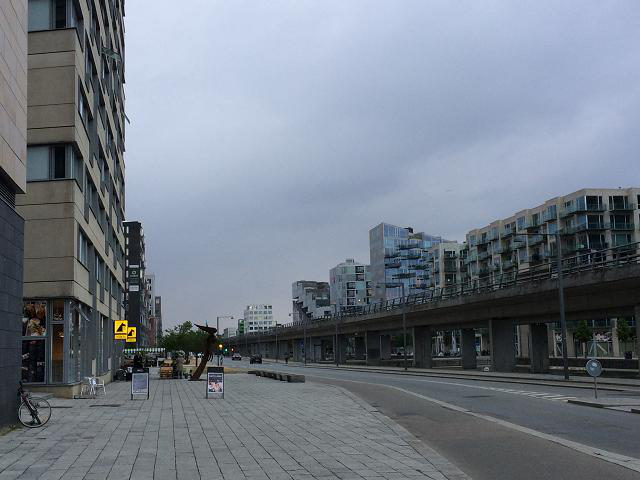

In [7]:
im

In [8]:
print(im.format, "{}x{} {}".format(*im.size, im.mode))

JPEG 640x480 RGB


In [9]:
thumb_size = (256,256)
im.thumbnail(thumb_size)

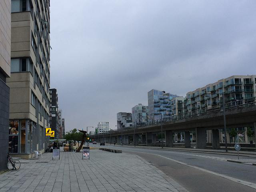

In [10]:
im

In [11]:
print(im.format, "{}x{} {}".format(*im.size, im.mode))

JPEG 256x192 RGB


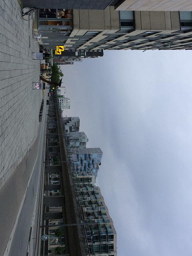

In [12]:
rot_im = im.rotate(270, expand=1)
rot_im

In [13]:
from ImageMetaData import ImageMetaData
meta_data = ImageMetaData(im)

In [14]:
exif_data = meta_data.get_exif_data()
exif_data

{'ImageWidth': 640,
 'ImageLength': 480,
 'GPSInfo': {'GPSLatitudeRef': 'N',
  'GPSLatitude': ((55, 1), (37, 1), (5453, 100)),
  'GPSLongitudeRef': 'E',
  'GPSLongitude': ((12, 1), (34, 1), (4837, 100)),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': (6146, 1339),
  'GPSTimeStamp': ((18, 1), (57, 1), (1400, 100)),
  'GPSSpeedRef': 'K',
  'GPSSpeed': (0, 1),
  'GPSImgDirectionRef': 'M',
  'GPSImgDirection': (14833, 618),
  'GPSDestBearingRef': 'M',
  'GPSDestBearing': (14833, 618),
  'GPSDateStamp': '2018:06:18',
  'GPSHPositioningError': (10, 1)},
 'ResolutionUnit': 2,
 'ExifOffset': 228,
 'Make': 'Apple',
 'Model': 'iPhone 5s',
 'Software': '11.4',
 'Orientation': 1,
 'DateTime': '2018:06:18 20:57:15',
 'YCbCrPositioning': 1,
 'XResolution': (72, 1),
 'YResolution': (72, 1),
 'ExifVersion': b'0221',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'ShutterSpeedValue': (13249, 1994),
 'DateTimeOriginal': '2018:06:18 20:57:15',
 'DateTimeDigitized': '2018:06:18 20:57:15',
 'ApertureValu

In [15]:
latlng = meta_data.get_lat_lng()
print(latlng)

(55.63181388888889, 12.580102777777778)


In [16]:
#!conda install -c conda-forge ipyleaflet
#!conda install -c conda-forge ipywidgets

In [17]:
from ipyleaflet import ( Map, Marker )
from IPython.display import display

In [18]:
# show map
center = latlng
zoom = 100
m = Map(center=center, zoom=zoom)
mark = Marker(location=m.center)
m += mark
mark.interact(opacity=(0.0,1.0,0.01))
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …